# 1) we only remove nans from the attributes that are basically reqd in the model training (regression)
# 2) for plotting curves/graphs we created a temp df which has all the nan values removed. use it only for plotting.
# 3) plot amazons comparable attributes with its competitor industries.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dataframes used in our analysis:

df,
df_temp (use only once),
amazon_df,
same_industry_df,
same_industry_df_no_amzn,
no_amzn(use only once),
mean_df 



[READ COLUMNS DESCRIPTION](https://docs.google.com/document/d/1LOS6Q3rGxCZfkW5f2btoINcoMgoPwVohezsov0KHJmY/edit)

In [53]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix

warnings.filterwarnings('ignore')

## Loading the data is the first step.




In [54]:
# loading dataset to read it.
df = pd.read_csv('/content/drive/MyDrive/Sample 1_CSV_S&P1500_Raw Dataset_Data Analytics in Business Assignment_2021.csv')

In [55]:
#looking for first 5 rows. 
df.head()

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
0,VRSK UW Equity,Verisk Analytics Inc,2016,US92345Y1064,7374.0,202020,US,6148.0,4631.2000,27.4,27.4,27.4,135.1000,22.4806,38.5965,60.7143,3.6378,11.5639,43.7213,64.1941
1,EVTC UN Equity,EVERTEC Inc,2016,PR30040P1032,7374.0,451020,PR,1650.0,885.6620,0.0,0.0,0.0,51.9200,4.6512,24.5614,51.7857,2.3375,8.5474,73.9553,54.8637
2,PFG UW Equity,Principal Financial Group Inc,2016,US74251V1026,6321.0,403010,US,14895.0,228014.3000,NaN,NaN,NaN,2719.6000,25.8929,28.3333,60.7143,1.0282,0.5895,13.4757,NaN
3,NXPI UW Equity,NXP Semiconductors NV,2016,NL0009538784,3674.0,453010,NL,40400.0,24898.0000,1560.0,1520.0,1560.0,1894.0000,40.3101,28.0702,26.7857,1.8811,0.7805,1.7817,42.8406
4,CELH UR Equity,Celsius Holdings Inc,2016,US15118V2079,2086.0,302010,US,39.0,17.7171,0.0,0.0,0.0,11.7471,NaN,3.5088,37.5000,6.2765,NaN,NaN,42.7479


In [56]:
#we check info about the data set.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4518 entries, 0 to 4517
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticker                            4518 non-null   object 
 1   Name                              4518 non-null   object 
 2   Year                              4518 non-null   int64  
 3   ISIN Number                       4518 non-null   object 
 4   SIC Code                          4437 non-null   float64
 5   GICS Industry                     4518 non-null   int64  
 6   Country or Territory of Domicile  4518 non-null   object 
 7   Number of Employees               4315 non-null   float64
 8   Total Assets                      4452 non-null   float64
 9   R&D Expense                       3503 non-null   float64
 10  R&D Expense Adjusted              3211 non-null   float64
 11  Operating Expenses R&D            3209 non-null   float64
 12  Cash a

# to filter by SIC Code: 2 digits only


In [57]:
# #to filter by SIC Code: 2 digits only
# num = 5989.0
# num//100

In [58]:
# inserting the column 'SIC Code 2 digit' to get started with our analysis..

# df['SIC_Code_2_digit'] = df['SIC Code'].apply(lambda x: x//100)
# df['SIC_Code_2_digit']

In [59]:
# checking if there are data available for all 3 years ; 16,17,18.

df[df['Name']=='Amazon.com Inc']

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
721,AMZN UW Equity,Amazon.com Inc,2016,US0231351067,5961.0,255020,US,341400.0,83402.0,16085.0,16085.0,16085.0,19334.0,12.4031,22.8070,51.7857,5.0575,3.2008,14.5153,35.0931
2227,AMZN UW Equity,Amazon.com Inc,2017,US0231351067,5961.0,255020,US,566000.0,131310.0,22620.0,22620.0,22620.0,20522.0,12.4031,22.8070,51.7857,5.0996,2.8252,12.9080,37.0684
3733,AMZN UW Equity,Amazon.com Inc,2018,US0231351067,5961.0,255020,US,647500.0,162648.0,28837.0,28837.0,28837.0,31750.0,21.7054,28.0702,57.1429,5.2664,6.8534,28.2719,40.2474


In [60]:
# total rows = 4518.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4518 entries, 0 to 4517
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticker                            4518 non-null   object 
 1   Name                              4518 non-null   object 
 2   Year                              4518 non-null   int64  
 3   ISIN Number                       4518 non-null   object 
 4   SIC Code                          4437 non-null   float64
 5   GICS Industry                     4518 non-null   int64  
 6   Country or Territory of Domicile  4518 non-null   object 
 7   Number of Employees               4315 non-null   float64
 8   Total Assets                      4452 non-null   float64
 9   R&D Expense                       3503 non-null   float64
 10  R&D Expense Adjusted              3211 non-null   float64
 11  Operating Expenses R&D            3209 non-null   float64
 12  Cash a

#incase you want to change Ticker middle values from UW,UR,UQ to UN, then use this code.

string = 'TMUN UW Equity'

def replace_string(string):
    var = string[-8]        
    if string[-8]!='N':
        string=string.replace(var,'N')
    return string

df_copy = df.copy()
df_copy=df_copy.apply(lambda x:replace_string(x['Ticker']), axis=1)

df_copy

In [61]:
#check the nans and their count

df.isna().sum()

Ticker                                 0
Name                                   0
Year                                   0
ISIN Number                            0
SIC Code                              81
GICS Industry                          0
Country or Territory of Domicile       0
Number of Employees                  203
Total Assets                          66
R&D Expense                         1015
R&D Expense Adjusted                1307
Operating Expenses R&D              1309
Cash and Cash Equivalents             66
Environmental Disclosure Score      1339
Social Disclosure Score              350
Governance Disclosure Score          147
Tobin's Q Ratio                      156
Return on Assets                     108
Return on Common Equity              286
Gross Margin                        1170
dtype: int64

In [62]:
# this gives us the total no. of rows in our dataframe

len(df)

4518

# % of nan values in each column 

In [63]:
#now to decide whether to drop nan or use mean median mode, lets see how much of the data constitute --
# -- of nan in each column by calc their percentage.


percent_missing = list(df.isnull().sum() * 100 / len(df))

#we made the above line of code as list because if we didnt, it took percent _missing as a series datatype...
#... which resulted in being the index of the newer data frame.


missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#percent_missing
missing_value_df

,column_name,percent_missing
0,Ticker,0.000000
1,Name,0.000000
2,Year,0.000000
3,ISIN Number,0.000000
4,SIC Code,1.792829
5,GICS Industry,0.000000
6,Country or Territory of Domicile,0.000000
7,Number of Employees,4.493139
8,Total Assets,1.460823
9,R&D Expense,22.465693


In [64]:
df.drop(columns=['Ticker', 'ISIN Number', 'GICS Industry'], inplace=True)
df.head()

,Name,Year,SIC Code,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
0,Verisk Analytics Inc,2016,7374.0,US,6148.0,4631.2000,27.4,27.4,27.4,135.1000,22.4806,38.5965,60.7143,3.6378,11.5639,43.7213,64.1941
1,EVERTEC Inc,2016,7374.0,PR,1650.0,885.6620,0.0,0.0,0.0,51.9200,4.6512,24.5614,51.7857,2.3375,8.5474,73.9553,54.8637
2,Principal Financial Group Inc,2016,6321.0,US,14895.0,228014.3000,NaN,NaN,NaN,2719.6000,25.8929,28.3333,60.7143,1.0282,0.5895,13.4757,NaN
3,NXP Semiconductors NV,2016,3674.0,NL,40400.0,24898.0000,1560.0,1520.0,1560.0,1894.0000,40.3101,28.0702,26.7857,1.8811,0.7805,1.7817,42.8406
4,Celsius Holdings Inc,2016,2086.0,US,39.0,17.7171,0.0,0.0,0.0,11.7471,NaN,3.5088,37.5000,6.2765,NaN,NaN,42.7479


#if we should remove nan or not yet

In [65]:
# removing all NaNs

In [66]:
# REMOVING ALL NANS
# df.dropna(inplace=True)

In [67]:
#we check the year column for any errors.
df['Year'].unique()

array([2016, 2017, 2018])

# checking correlation

In [68]:
df.corr()

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
Year,1.000000e+00,2.179111e-18,0.006351,0.006002,0.014248,0.010398,0.012333,0.006677,0.021585,0.084185,0.102355,0.005079,0.036690,0.030520,0.012161
SIC Code,2.179111e-18,1.000000e+00,0.024698,0.059375,0.008443,0.017492,0.013922,0.029563,-0.169048,-0.199692,-0.147704,-0.032343,-0.041816,0.008803,0.209900
Number of Employees,6.350571e-03,2.469766e-02,1.000000,0.254206,0.230902,0.180740,0.178230,0.253477,0.230034,0.207846,0.232674,-0.001348,0.044301,0.107028,-0.089217
Total Assets,6.001892e-03,5.937471e-02,0.254206,1.000000,0.465262,0.462834,0.460113,0.533807,0.233486,0.177776,0.298020,-0.059954,-0.033079,0.005420,0.004929
R&D Expense,1.424790e-02,8.442777e-03,0.230902,0.465262,1.000000,0.980065,0.983426,0.370061,0.244969,0.177048,0.167944,0.033633,0.037174,0.045546,0.118663
R&D Expense Adjusted,1.039837e-02,1.749176e-02,0.180740,0.462834,0.980065,1.000000,0.996589,0.385733,0.235918,0.170278,0.156585,0.037223,0.040436,0.047309,0.147721
Operating Expenses R&D,1.233324e-02,1.392213e-02,0.178230,0.460113,0.983426,0.996589,1.000000,0.385808,0.237925,0.173343,0.161017,0.037072,0.040639,0.049329,0.151117
Cash and Cash Equivalents,6.676637e-03,2.956254e-02,0.253477,0.533807,0.370061,0.385733,0.385808,1.000000,0.262172,0.133582,0.214423,-0.028446,-0.004933,0.027278,-0.006509
Environmental Disclosure Score,2.158475e-02,-1.690478e-01,0.230034,0.233486,0.244969,0.235918,0.237925,0.262172,1.000000,0.779613,0.732462,0.028608,0.102311,0.113406,0.075423
Social Disclosure Score,8.418452e-02,-1.996915e-01,0.207846,0.177776,0.177048,0.170278,0.173343,0.133582,0.779613,1.000000,0.692949,-0.023064,0.064622,0.118789,-0.036667


In [69]:
# renaming a column from 'Country or Territory of Domicile' to 'Territory of Domicile'

df.rename(columns = {'Country or Territory of Domicile': 'Head Quarter'},inplace=True)


# df['Head Quarter'].unique()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4518 entries, 0 to 4517
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            4518 non-null   object 
 1   Year                            4518 non-null   int64  
 2   SIC Code                        4437 non-null   float64
 3   Head Quarter                    4518 non-null   object 
 4   Number of Employees             4315 non-null   float64
 5   Total Assets                    4452 non-null   float64
 6   R&D Expense                     3503 non-null   float64
 7   R&D Expense Adjusted            3211 non-null   float64
 8   Operating Expenses R&D          3209 non-null   float64
 9   Cash and Cash Equivalents       4452 non-null   float64
 10  Environmental Disclosure Score  3179 non-null   float64
 11  Social Disclosure Score         4168 non-null   float64
 12  Governance Disclosure Score     43

# all cleaning of data is done. Now we need to select any 1 company of our choice, say, Amazon and then select all the competitive industries for it. We will be using SIC Code only.

In [71]:
# first we try to find our desired company's name from the dataframe and 
df[df['Name'].str.contains('Amazon')]

,Name,Year,SIC Code,Head Quarter,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
721,Amazon.com Inc,2016,5961.0,US,341400.0,83402.0,16085.0,16085.0,16085.0,19334.0,12.4031,22.8070,51.7857,5.0575,3.2008,14.5153,35.0931
2227,Amazon.com Inc,2017,5961.0,US,566000.0,131310.0,22620.0,22620.0,22620.0,20522.0,12.4031,22.8070,51.7857,5.0996,2.8252,12.9080,37.0684
3733,Amazon.com Inc,2018,5961.0,US,647500.0,162648.0,28837.0,28837.0,28837.0,31750.0,21.7054,28.0702,57.1429,5.2664,6.8534,28.2719,40.2474


In [72]:
# storing the filtered data into new variable: amazon_df

amazon_df = df[df['Name'].str.contains('Amazon')]

#but no dont use it

In [73]:
amazon_df

,Name,Year,SIC Code,Head Quarter,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
721,Amazon.com Inc,2016,5961.0,US,341400.0,83402.0,16085.0,16085.0,16085.0,19334.0,12.4031,22.8070,51.7857,5.0575,3.2008,14.5153,35.0931
2227,Amazon.com Inc,2017,5961.0,US,566000.0,131310.0,22620.0,22620.0,22620.0,20522.0,12.4031,22.8070,51.7857,5.0996,2.8252,12.9080,37.0684
3733,Amazon.com Inc,2018,5961.0,US,647500.0,162648.0,28837.0,28837.0,28837.0,31750.0,21.7054,28.0702,57.1429,5.2664,6.8534,28.2719,40.2474


# we plotted the data now we will compare the same with the same industry like compare it with 4 digit sic code and see other companies total assets grew or fall. AMZN SIC = 5961

In [74]:
same_industry_df = df[df['SIC Code']==5961.0]

In [75]:
same_industry_df

,Name,Year,SIC Code,Head Quarter,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
721,Amazon.com Inc,2016,5961.0,US,341400.0,83402.000,16085.0,16085.0,16085.0,19334.000,12.4031,22.8070,51.7857,5.0575,3.2008,14.5153,35.0931
807,Insight Enterprises Inc,2016,5961.0,US,5930.0,2219.300,NaN,0.0,0.0,202.882,NaN,14.0351,55.3571,1.3251,4.0011,12.1056,13.5466
1321,PC Connection Inc,2016,5961.0,US,2501.0,686.134,0.0,0.0,0.0,49.180,NaN,NaN,48.2143,1.4576,7.2609,11.6507,13.7844
1427,CDW Corp/DE,2016,5961.0,US,8516.0,6948.400,0.0,0.0,0.0,263.700,NaN,8.7719,51.7857,2.0513,6.1939,39.6376,16.6444
2227,Amazon.com Inc,2017,5961.0,US,566000.0,131310.000,22620.0,22620.0,22620.0,20522.000,12.4031,22.8070,51.7857,5.0996,2.8252,12.9080,37.0684
2313,Insight Enterprises Inc,2017,5961.0,US,6697.0,2685.651,NaN,0.0,0.0,105.831,NaN,19.2982,55.3571,1.1968,3.6976,11.6491,13.7026
2827,PC Connection Inc,2017,5961.0,US,2505.0,747.851,0.0,0.0,0.0,49.990,NaN,8.7719,51.7857,1.2963,7.6510,11.9815,13.1213
2933,CDW Corp/DE,2017,5961.0,US,8726.0,6966.700,0.0,0.0,0.0,144.200,10.8527,19.2982,51.7857,2.3856,7.5185,51.5090,16.5187
3733,Amazon.com Inc,2018,5961.0,US,647500.0,162648.000,28837.0,28837.0,28837.0,31750.000,21.7054,28.0702,57.1429,5.2664,6.8534,28.2719,40.2474
3819,Insight Enterprises Inc,2018,5961.0,US,7420.0,2775.947,NaN,0.0,0.0,142.655,NaN,19.2982,55.3571,1.1653,5.9937,17.8837,14.0353


In [76]:
# to remove rows from the dataframe, this can only be done using the index no., so we find the indexes of the ones..
# .. we wanna drop.

same_industry_df.index[(same_industry_df['Name']=='Amazon.com Inc')]

Int64Index([721, 2227, 3733], dtype='int64')

In [77]:
same_industry_df_no_amzn = same_industry_df.drop([721,2227, 3733])
# same_industry_df['Name'] = same_industry_df[same_industry_df["Name"]!='Amazon.com Inc']


In [78]:
same_industry_df_no_amzn

,Name,Year,SIC Code,Head Quarter,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
807,Insight Enterprises Inc,2016,5961.0,US,5930.0,2219.300,NaN,0.0,0.0,202.882,NaN,14.0351,55.3571,1.3251,4.0011,12.1056,13.5466
1321,PC Connection Inc,2016,5961.0,US,2501.0,686.134,0.0,0.0,0.0,49.180,NaN,NaN,48.2143,1.4576,7.2609,11.6507,13.7844
1427,CDW Corp/DE,2016,5961.0,US,8516.0,6948.400,0.0,0.0,0.0,263.700,NaN,8.7719,51.7857,2.0513,6.1939,39.6376,16.6444
2313,Insight Enterprises Inc,2017,5961.0,US,6697.0,2685.651,NaN,0.0,0.0,105.831,NaN,19.2982,55.3571,1.1968,3.6976,11.6491,13.7026
2827,PC Connection Inc,2017,5961.0,US,2505.0,747.851,0.0,0.0,0.0,49.990,NaN,8.7719,51.7857,1.2963,7.6510,11.9815,13.1213
2933,CDW Corp/DE,2017,5961.0,US,8726.0,6966.700,0.0,0.0,0.0,144.200,10.8527,19.2982,51.7857,2.3856,7.5185,51.5090,16.5187
3819,Insight Enterprises Inc,2018,5961.0,US,7420.0,2775.947,NaN,0.0,0.0,142.655,NaN,19.2982,55.3571,1.1653,5.9937,17.8837,14.0353
4333,PC Connection Inc,2018,5961.0,US,2513.0,805.355,0.0,0.0,0.0,91.703,NaN,8.7719,51.7857,1.3214,8.3172,12.8139,15.2283
4439,CDW Corp/DE,2018,5961.0,US,9019.0,7167.700,0.0,0.0,0.0,205.800,10.8527,19.2982,46.4286,2.5341,9.0984,65.5855,16.6676


# comparing total assets of amazon over 3 years; 16,17,18
wasted

In [79]:
# # comparing amazons growth (total assets)

# sns.lineplot(x='Year', y='Total Assets', data = amazon_df).set(title="amazon's growth")
# plt.xticks([2016,2017,2018])
# sns

#  comparing total assets of amazon & competitor industry over 3 years; 16,17,18

([<matplotlib.axis.XTick at 0x7faada58f750>,
 <a list of 3 Text major ticklabel objects>)

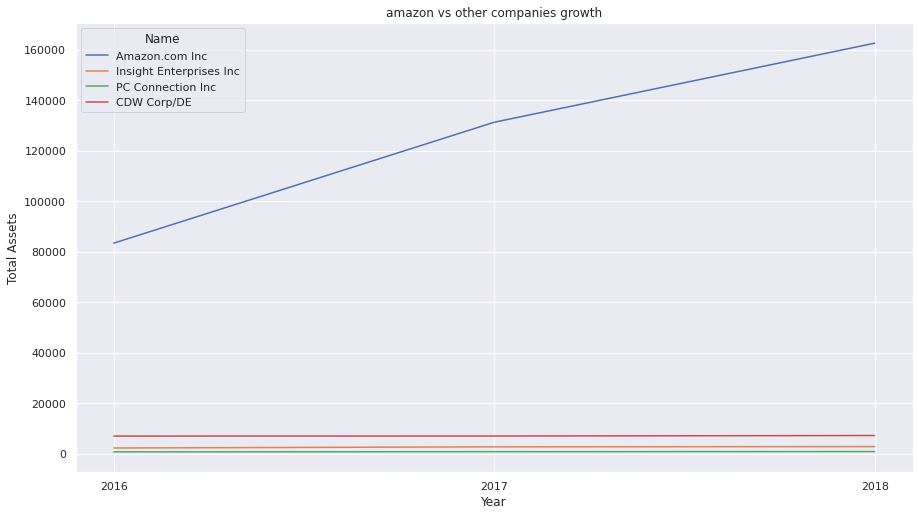

In [80]:
import seaborn as sns
sns.lineplot(x='Year', y='Total Assets', data = same_industry_df,hue= 'Name').set(title="amazon vs other companies growth")
plt.xticks([2016,2017,2018])

# EDS over time

In [81]:
# sns.lineplot(x = "Year", y = "Environmental Disclosure Score", data = amazon_df)
# plt.title('EDS for amazon')
# plt.xticks([2016,2017,2018])
# # growth in eds

([<matplotlib.axis.XTick at 0x7faada611e10>,
 <a list of 3 Text major ticklabel objects>)

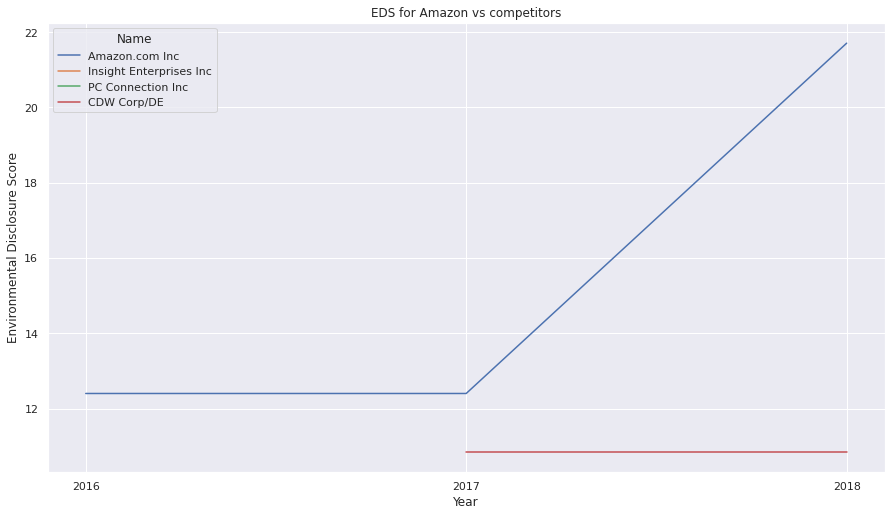

In [82]:
no_amzn = same_industry_df_no_amzn.copy()           
no_amzn.dropna(inplace=True)


sns.lineplot(x = "Year", y = "Environmental Disclosure Score", data = same_industry_df, hue = "Name")
plt.title('EDS for Amazon vs competitors')
plt.xticks([2016,2017,2018])


In [83]:
# if we check why we got just a line in our plot, it was bcs we had nan values and ....
# ....they got removed in the ABOVE plot

same_industry_df_no_amzn

,Name,Year,SIC Code,Head Quarter,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
807,Insight Enterprises Inc,2016,5961.0,US,5930.0,2219.300,NaN,0.0,0.0,202.882,NaN,14.0351,55.3571,1.3251,4.0011,12.1056,13.5466
1321,PC Connection Inc,2016,5961.0,US,2501.0,686.134,0.0,0.0,0.0,49.180,NaN,NaN,48.2143,1.4576,7.2609,11.6507,13.7844
1427,CDW Corp/DE,2016,5961.0,US,8516.0,6948.400,0.0,0.0,0.0,263.700,NaN,8.7719,51.7857,2.0513,6.1939,39.6376,16.6444
2313,Insight Enterprises Inc,2017,5961.0,US,6697.0,2685.651,NaN,0.0,0.0,105.831,NaN,19.2982,55.3571,1.1968,3.6976,11.6491,13.7026
2827,PC Connection Inc,2017,5961.0,US,2505.0,747.851,0.0,0.0,0.0,49.990,NaN,8.7719,51.7857,1.2963,7.6510,11.9815,13.1213
2933,CDW Corp/DE,2017,5961.0,US,8726.0,6966.700,0.0,0.0,0.0,144.200,10.8527,19.2982,51.7857,2.3856,7.5185,51.5090,16.5187
3819,Insight Enterprises Inc,2018,5961.0,US,7420.0,2775.947,NaN,0.0,0.0,142.655,NaN,19.2982,55.3571,1.1653,5.9937,17.8837,14.0353
4333,PC Connection Inc,2018,5961.0,US,2513.0,805.355,0.0,0.0,0.0,91.703,NaN,8.7719,51.7857,1.3214,8.3172,12.8139,15.2283
4439,CDW Corp/DE,2018,5961.0,US,9019.0,7167.700,0.0,0.0,0.0,205.800,10.8527,19.2982,46.4286,2.5341,9.0984,65.5855,16.6676


# SDS over time

([<matplotlib.axis.XTick at 0x7faada5036d0>,
 <a list of 3 Text major ticklabel objects>)

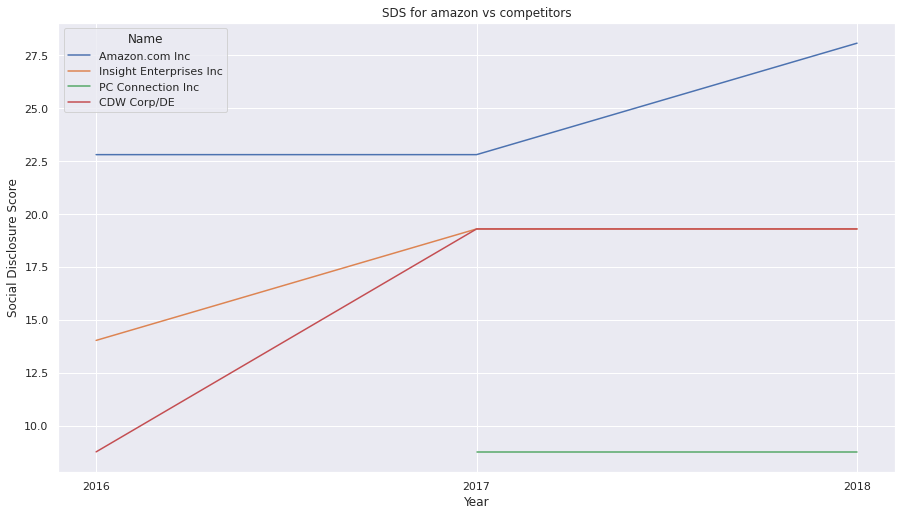

In [84]:
sns.lineplot(x = "Year", y = "Social Disclosure Score", data = same_industry_df, hue = "Name")
plt.title('SDS for amazon vs competitors')
plt.xticks([2016,2017,2018])

#THIS PLOT MEANS PC CONNECTION.INC WAS NOT REGISTERED WITH THE ESG DATA SET AND HENCE NO DATA AVAILABLE FOR THAT YEAR,

In [85]:
# sns.lineplot(x = "Year", y = "Social Disclosure Score", data = amazon_df)
# plt.title('SDS for Amazon')
# plt.xticks([2016,2017,2018])

# GDC over time

([<matplotlib.axis.XTick at 0x7faadfdb0b10>,
 <a list of 3 Text major ticklabel objects>)

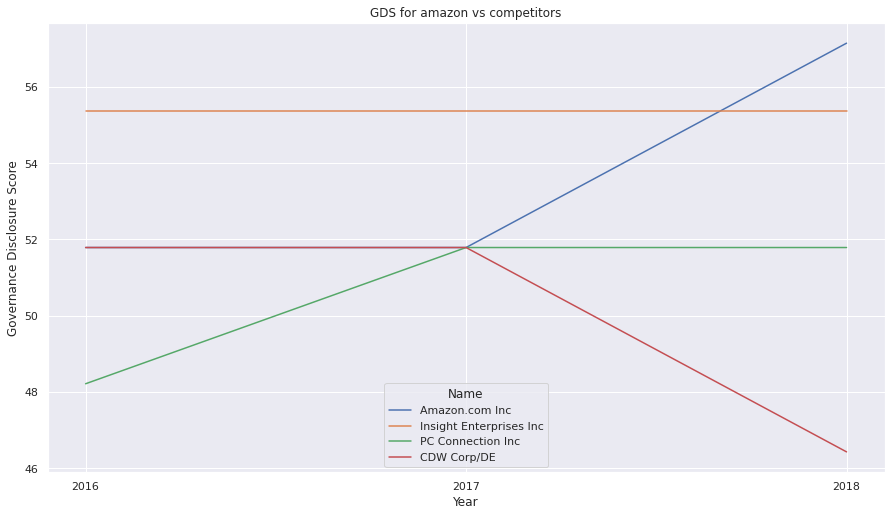

In [86]:
sns.lineplot(x = "Year", y = "Governance Disclosure Score", data = same_industry_df, hue = "Name")
plt.title('GDS for amazon vs competitors')
plt.xticks([2016,2017,2018])



In [87]:
# sns.lineplot(x = "Year", y = "Governance Disclosure Score", data = amazon_df)
# plt.title('GDS for Amazon')
# plt.xticks([2016,2017,2018])

# now we will check the number of employees in these companies over time 

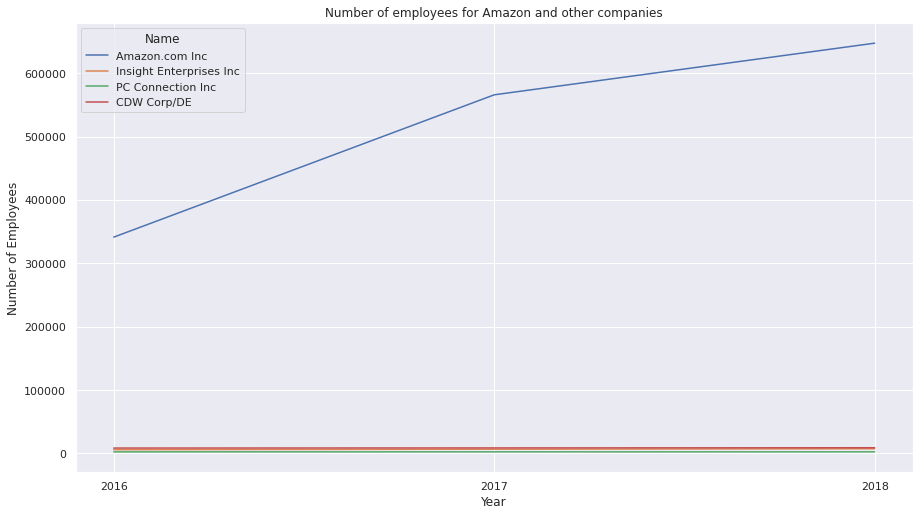

In [88]:
sns.lineplot(x = "Year", y = "Number of Employees", data = same_industry_df, hue = "Name")
plt.title('Number of employees for Amazon and other companies')
plt.xticks([2016,2017,2018],[2016,2017,2018])
plt.show()

# sns.lineplot(amazon_df['Year'],amazon_df['Number of Employees'])
# plt.xticks([2016,2017,2018],[2016,2017,2018])
# plt.show();

# we will now compare the relation bw no. of employees vs total assets.

Text(0.5, 1.0, 'Total assets vs Number of employees')

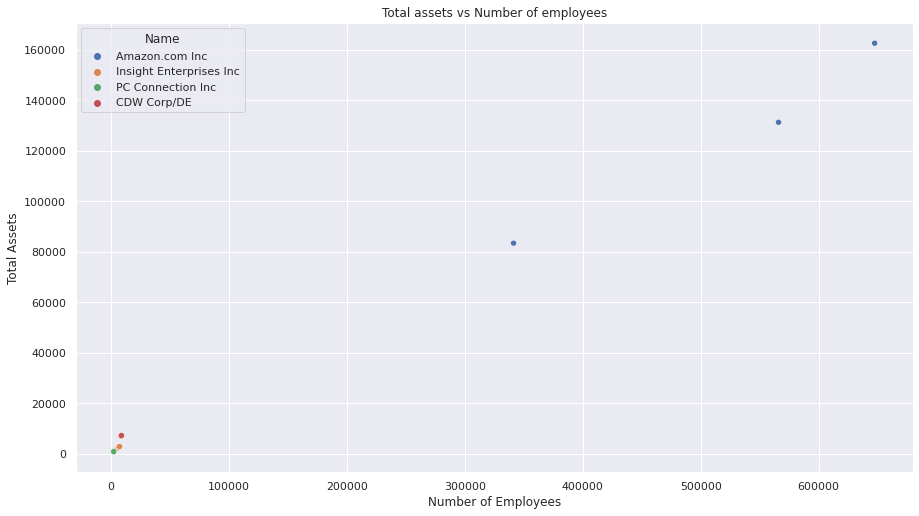

In [89]:
# for increasing the size of the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

# actual plot
sns.scatterplot('Number of Employees', 'Total Assets', data= same_industry_df,hue='Name')
plt.title('Total assets vs Number of employees')

In the above figure, it can be inferred that total assets is directly proportional to no. of employees.

In [90]:
# timepass corr down

df.corr()

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
Year,1.000000e+00,2.179111e-18,0.006351,0.006002,0.014248,0.010398,0.012333,0.006677,0.021585,0.084185,0.102355,0.005079,0.036690,0.030520,0.012161
SIC Code,2.179111e-18,1.000000e+00,0.024698,0.059375,0.008443,0.017492,0.013922,0.029563,-0.169048,-0.199692,-0.147704,-0.032343,-0.041816,0.008803,0.209900
Number of Employees,6.350571e-03,2.469766e-02,1.000000,0.254206,0.230902,0.180740,0.178230,0.253477,0.230034,0.207846,0.232674,-0.001348,0.044301,0.107028,-0.089217
Total Assets,6.001892e-03,5.937471e-02,0.254206,1.000000,0.465262,0.462834,0.460113,0.533807,0.233486,0.177776,0.298020,-0.059954,-0.033079,0.005420,0.004929
R&D Expense,1.424790e-02,8.442777e-03,0.230902,0.465262,1.000000,0.980065,0.983426,0.370061,0.244969,0.177048,0.167944,0.033633,0.037174,0.045546,0.118663
R&D Expense Adjusted,1.039837e-02,1.749176e-02,0.180740,0.462834,0.980065,1.000000,0.996589,0.385733,0.235918,0.170278,0.156585,0.037223,0.040436,0.047309,0.147721
Operating Expenses R&D,1.233324e-02,1.392213e-02,0.178230,0.460113,0.983426,0.996589,1.000000,0.385808,0.237925,0.173343,0.161017,0.037072,0.040639,0.049329,0.151117
Cash and Cash Equivalents,6.676637e-03,2.956254e-02,0.253477,0.533807,0.370061,0.385733,0.385808,1.000000,0.262172,0.133582,0.214423,-0.028446,-0.004933,0.027278,-0.006509
Environmental Disclosure Score,2.158475e-02,-1.690478e-01,0.230034,0.233486,0.244969,0.235918,0.237925,0.262172,1.000000,0.779613,0.732462,0.028608,0.102311,0.113406,0.075423
Social Disclosure Score,8.418452e-02,-1.996915e-01,0.207846,0.177776,0.177048,0.170278,0.173343,0.133582,0.779613,1.000000,0.692949,-0.023064,0.064622,0.118789,-0.036667


#Descriptive analytics

In [91]:
df.describe()

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
count,4518.000000,4437.00000,4.315000e+03,4.452000e+03,3503.000000,3211.000000,3209.000000,4452.000000,3179.000000,4168.000000,4371.000000,4362.000000,4410.000000,4232.000000,3348.000000
mean,2017.000000,4878.03854,2.210275e+04,2.577978e+04,288.511278,277.162533,283.099503,1200.169985,19.249815,22.714809,55.585094,2.196901,4.926009,14.295415,40.775747
std,0.816587,1843.51219,7.733196e+04,1.284356e+05,1448.991512,1447.865785,1472.953991,5612.076588,18.555317,14.355327,6.803436,2.555735,11.108378,45.877992,21.616105
min,2016.000000,700.00000,2.000000e+00,4.091000e+00,0.000000,0.000000,0.000000,0.000000,0.775200,3.125000,3.571400,0.584400,-159.753200,-909.896700,-42.905800
25%,2016.000000,3541.00000,1.500000e+03,1.289377e+03,0.000000,0.000000,0.000000,57.069750,2.325600,13.333300,51.785700,1.194425,1.277650,5.741850,23.976450
50%,2017.000000,4924.00000,5.125000e+03,3.960624e+03,0.000000,0.000000,0.000000,181.079500,11.627900,19.298200,51.785700,1.629000,4.258950,11.172400,37.561950
75%,2018.000000,6331.00000,1.570700e+04,1.294016e+04,72.759000,61.144500,61.393000,609.940250,34.596750,29.824600,57.142900,2.438100,8.445450,19.569800,55.957800
max,2018.000000,8744.00000,2.300000e+06,2.622532e+06,28837.000000,28837.000000,28837.000000,130547.000000,80.165300,80.701800,85.714300,123.855400,259.276400,1048.621600,99.787700


In [138]:
# boxplot for EDS
import plotly.express as px

# we make a temporary df so we can remove nan from eds column, and roa column;
temp_df = df.copy()
temp_df.dropna(subset=['Environmental Disclosure Score', 'Return on Assets'], inplace=True)

fig = px.box(temp_df, y="Environmental Disclosure Score")
fig.show()

In [137]:
# boxplot for RoA
fig = px.box(temp_df, y="Return on Assets")
fig.show()

In [146]:
# company with the minimum EDS 
min_eds = temp_df[temp_df['Environmental Disclosure Score'] == 0.7752]
min_eds[['Name', 'Environmental Disclosure Score']]

,Name,Environmental Disclosure Score
99,Aerojet Rocketdyne Holdings Inc,0.7752
1605,Aerojet Rocketdyne Holdings Inc,0.7752
3111,Aerojet Rocketdyne Holdings Inc,0.7752


In [142]:
# company with the maximum EDS 
max_eds = temp_df[temp_df['Environmental Disclosure Score'] == 80.165300]
max_eds[['Name', 'Environmental Disclosure Score']]

,Name,Environmental Disclosure Score
1581,Hess Corp,80.1653
3087,Hess Corp,80.1653


In [148]:
# roa > 50%
lol = temp_df[temp_df['Return on Assets']==171.9715]
lol[['Name', 'Return on Assets']]

,Name,Return on Assets
3085,Antero Midstream Corp,171.9715


In [151]:
# roa > 50%
lol = temp_df[temp_df['Return on Assets']== -86.8078]
lol[['Name', 'Return on Assets']]

,Name,Return on Assets
3455,BioLife Solutions Inc,-86.8078


 # to check is amazon's financial performance (ROA) with the competitors better or poor?, bar plot is used to plot the mean

In [97]:
# avg FP (ROA) for Amazon.

a_mean = amazon_df.describe()
a_mean

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
count,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2017.0,5961.0,518300.000000,125786.666667,22514.000000,22514.000000,22514.000000,23868.666667,15.503867,24.56140,53.571433,5.141167,4.293133,18.565067,37.469633
std,1.0,0.0,158526.874693,39910.681995,6376.660803,6376.660803,6376.660803,6851.233271,5.370685,3.03871,3.092981,0.110479,2.225195,8.444691,2.600470
min,2016.0,5961.0,341400.000000,83402.000000,16085.000000,16085.000000,16085.000000,19334.000000,12.403100,22.80700,51.785700,5.057500,2.825200,12.908000,35.093100
25%,2016.5,5961.0,453700.000000,107356.000000,19352.500000,19352.500000,19352.500000,19928.000000,12.403100,22.80700,51.785700,5.078550,3.013000,13.711650,36.080750
50%,2017.0,5961.0,566000.000000,131310.000000,22620.000000,22620.000000,22620.000000,20522.000000,12.403100,22.80700,51.785700,5.099600,3.200800,14.515300,37.068400
75%,2017.5,5961.0,606750.000000,146979.000000,25728.500000,25728.500000,25728.500000,26136.000000,17.054250,25.43860,54.464300,5.183000,5.027100,21.393600,38.657900
max,2018.0,5961.0,647500.000000,162648.000000,28837.000000,28837.000000,28837.000000,31750.000000,21.705400,28.07020,57.142900,5.266400,6.853400,28.271900,40.247400


In [98]:
# amazon's data's FinPerf mean:

amazon_roa_mean = a_mean['Return on Assets'][1]
amazon_roa_mean

4.2931333333333335

In [99]:
# avg FP (ROA) for competitive companies.

s_mean = same_industry_df_no_amzn.describe()
s_mean

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
count,9.000000,9.0,9.000000,9.000000,6.0,9.0,9.0,9.000000,2.0000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2017.000000,5961.0,5980.777778,3444.782000,0.0,0.0,0.0,139.549000,10.8527,14.692950,51.984111,1.637056,6.636922,26.090733,14.805467
std,0.866025,0.0,2783.807455,2804.347979,0.0,0.0,0.0,73.704246,0.0000,5.215945,3.149679,0.535987,1.846424,20.750909,1.467838
min,2016.000000,5961.0,2501.000000,686.134000,0.0,0.0,0.0,49.180000,10.8527,8.771900,46.428600,1.165300,3.697600,11.649100,13.121300
25%,2016.000000,5961.0,2513.000000,805.355000,0.0,0.0,0.0,91.703000,10.8527,8.771900,51.785700,1.296300,5.993700,11.981500,13.702600
50%,2017.000000,5961.0,6697.000000,2685.651000,0.0,0.0,0.0,142.655000,10.8527,16.666650,51.785700,1.325100,7.260900,12.813900,14.035300
75%,2018.000000,5961.0,8516.000000,6948.400000,0.0,0.0,0.0,202.882000,10.8527,19.298200,55.357100,2.051300,7.651000,39.637600,16.518700
max,2018.000000,5961.0,9019.000000,7167.700000,0.0,0.0,0.0,263.700000,10.8527,19.298200,55.357100,2.534100,9.098400,65.585500,16.667600


In [100]:
# OTHERS datas FP mean:
same_industry_roa_mean = s_mean['Return on Assets'][1]
same_industry_roa_mean

6.636922222222221

In [101]:
# we created a df for plotting of our ROA mean:

mean_df= pd.DataFrame({"mean for amazon's ROA": amazon_roa_mean,'other competitors mean for ROA': same_industry_roa_mean}, index=['.'])

mean_df

,mean for amazon's ROA,other competitors mean for ROA
.,4.293133,6.636922


Text(0.5, 1.0, 'Average Return on Assets comparison')

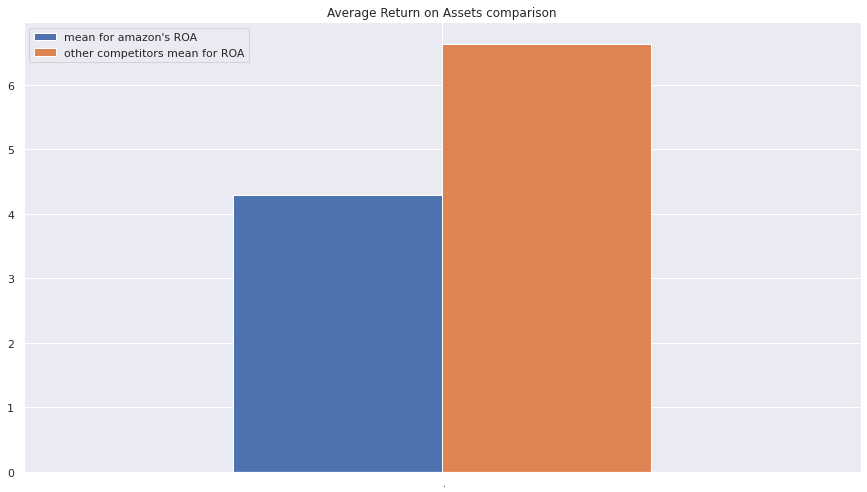

In [102]:
mean_df.plot.bar()
plt.title('Average Return on Assets comparison')

In [103]:
same_industry_df_no_amzn.corr()

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
Year,1.000000,NaN,0.103957,0.046074,NaN,NaN,NaN,-0.148058,NaN,0.323873,-0.081832,0.050304,0.465386,0.228768,0.192321
SIC Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Employees,0.103957,NaN,1.000000,0.905372,NaN,NaN,NaN,0.790519,NaN,0.653206,0.052295,0.649727,-0.137266,0.753035,0.646357
Total Assets,0.046074,NaN,0.905372,1.000000,NaN,NaN,NaN,0.762623,NaN,0.377882,-0.276927,0.890373,0.186293,0.924815,0.866890
R&D Expense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R&D Expense Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating Expenses R&D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cash and Cash Equivalents,-0.148058,NaN,0.790519,0.762623,NaN,NaN,NaN,1.000000,NaN,0.087038,0.045602,0.537282,-0.170158,0.588141,0.621133
Environmental Disclosure Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social Disclosure Score,0.323873,NaN,0.653206,0.377882,NaN,NaN,NaN,0.087038,NaN,1.000000,0.053469,0.241740,-0.177637,0.365497,0.094880


In [104]:
df.corr()

,Year,SIC Code,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
Year,1.000000e+00,2.179111e-18,0.006351,0.006002,0.014248,0.010398,0.012333,0.006677,0.021585,0.084185,0.102355,0.005079,0.036690,0.030520,0.012161
SIC Code,2.179111e-18,1.000000e+00,0.024698,0.059375,0.008443,0.017492,0.013922,0.029563,-0.169048,-0.199692,-0.147704,-0.032343,-0.041816,0.008803,0.209900
Number of Employees,6.350571e-03,2.469766e-02,1.000000,0.254206,0.230902,0.180740,0.178230,0.253477,0.230034,0.207846,0.232674,-0.001348,0.044301,0.107028,-0.089217
Total Assets,6.001892e-03,5.937471e-02,0.254206,1.000000,0.465262,0.462834,0.460113,0.533807,0.233486,0.177776,0.298020,-0.059954,-0.033079,0.005420,0.004929
R&D Expense,1.424790e-02,8.442777e-03,0.230902,0.465262,1.000000,0.980065,0.983426,0.370061,0.244969,0.177048,0.167944,0.033633,0.037174,0.045546,0.118663
R&D Expense Adjusted,1.039837e-02,1.749176e-02,0.180740,0.462834,0.980065,1.000000,0.996589,0.385733,0.235918,0.170278,0.156585,0.037223,0.040436,0.047309,0.147721
Operating Expenses R&D,1.233324e-02,1.392213e-02,0.178230,0.460113,0.983426,0.996589,1.000000,0.385808,0.237925,0.173343,0.161017,0.037072,0.040639,0.049329,0.151117
Cash and Cash Equivalents,6.676637e-03,2.956254e-02,0.253477,0.533807,0.370061,0.385733,0.385808,1.000000,0.262172,0.133582,0.214423,-0.028446,-0.004933,0.027278,-0.006509
Environmental Disclosure Score,2.158475e-02,-1.690478e-01,0.230034,0.233486,0.244969,0.235918,0.237925,0.262172,1.000000,0.779613,0.732462,0.028608,0.102311,0.113406,0.075423
Social Disclosure Score,8.418452e-02,-1.996915e-01,0.207846,0.177776,0.177048,0.170278,0.173343,0.133582,0.779613,1.000000,0.692949,-0.023064,0.064622,0.118789,-0.036667


# We will start regression (predictive analytics)

In [105]:
# lets start regression now.


In [106]:
# from sklearn import linear_model

In [107]:
# when assigning multiple columns to a dataframe we need to specifically specify 'keyword columns='

data_to_be_trained = pd.DataFrame(df, columns=['Environmental Disclosure Score', 'Cash and Cash Equivalents',"Tobin's Q Ratio", "Return on Assets", 'Gross Margin'])
# data_to_be_trained.dropna(inplace=True)

In [108]:
data_to_be_trained.head()

,Environmental Disclosure Score,Cash and Cash Equivalents,Tobin's Q Ratio,Return on Assets,Gross Margin
0,22.4806,135.1000,3.6378,11.5639,64.1941
1,4.6512,51.9200,2.3375,8.5474,54.8637
2,25.8929,2719.6000,1.0282,0.5895,NaN
3,40.3101,1894.0000,1.8811,0.7805,42.8406
4,NaN,11.7471,6.2765,NaN,42.7479


In [109]:
data_to_be_trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4518 entries, 0 to 4517
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Environmental Disclosure Score  3179 non-null   float64
 1   Cash and Cash Equivalents       4452 non-null   float64
 2   Tobin's Q Ratio                 4362 non-null   float64
 3   Return on Assets                4410 non-null   float64
 4   Gross Margin                    3348 non-null   float64
dtypes: float64(5)
memory usage: 176.6 KB


In [110]:
from sklearn.linear_model import LinearRegression
data_to_be_trained.dropna(subset= ['Environmental Disclosure Score'], inplace=True)
data_to_be_trained.dropna(subset= ['Return on Assets'], inplace=True)


X = data_to_be_trained[['Environmental Disclosure Score']]      #independent variable
y = data_to_be_trained[["Return on Assets"]]    #dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)


In [111]:
# X_test.values

In [112]:
# X = data_to_be_trained[['Environmental Disclosure Score']]
# y = data_to_be_trained[["Return on Assets"]]
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
type(X)

pandas.core.frame.DataFrame

In [114]:
# this is 80% of our data
X_train

,Environmental Disclosure Score
2025,1.5504
1785,17.8295
3099,17.8295
865,1.7857
542,13.3929
...,...
825,5.3571
15,47.9339
1150,26.3566
1841,54.4828


In [115]:
# this is 20 % of our main data

X_test


,Environmental Disclosure Score
250,37.9845
2874,3.1008
1798,23.2558
3599,15.6250
1161,3.8760
...,...
260,3.1008
3240,10.0775
3999,36.4341
2825,38.5417


In [116]:
X_train.values

array([[ 1.5504],
       [17.8295],
       [17.8295],
       ...,
       [26.3566],
       [54.4828],
       [58.9147]])

In [117]:
# to make array a 2d one, we use .reshape(-1,1)

X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [118]:
X_train

array([[ 1.5504],
       [17.8295],
       [17.8295],
       ...,
       [26.3566],
       [54.4828],
       [58.9147]])

# here now we will train the data below

In [119]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [120]:
# predicted values
y_predicted = regressor.predict(X_test)
y_predicted

array([[5.94384709],
       [4.19615573],
       [5.20593162],
       [4.82362461],
       [4.23499365],
       [4.11847989],
       [4.14517845],
       [4.13026854],
       [5.1670937 ],
       [4.545692  ],
       [5.3612833 ],
       [4.13026854],
       [4.11847989],
       [4.23499365],
       [5.97572104],
       [5.51663498],
       [5.40012122],
       [4.31266949],
       [6.3710592 ],
       [4.26446778],
       [4.70104368],
       [5.44988105],
       [4.62336784],
       [7.04683499],
       [6.9924609 ],
       [4.11847989],
       [4.77871952],
       [4.46801616],
       [4.11847989],
       [4.24446265],
       [4.57759601],
       [4.92799901],
       [5.51663498],
       [4.35150741],
       [7.53618677],
       [6.29338336],
       [4.35150741],
       [6.04482468],
       [4.39034032],
       [4.13026854],
       [4.11847989],
       [4.11847989],
       [6.21571253],
       [4.13026854],
       [5.86617125],
       [4.62336784],
       [4.11847989],
       [4.118

In [121]:
print(len(y_test),len(y_predicted))

635 635


In [122]:
# regression score below
# if we multiply by 100 it tell us our accuracy in %
# data that is known to our model

regressor.score(X_train,y_train)

0.013077694887776659

In [123]:
# unknown data for our model or test data
regressor.score(X_test,y_test)

-0.011656559084270324

In [124]:
# squared = False bcs if it is true then it shows the MSE (mean squared error) and if false it then shows root mean squared error.
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_predicted, squared=False)
rmse

7.0910194414154635

In [125]:
rmse

7.0910194414154635

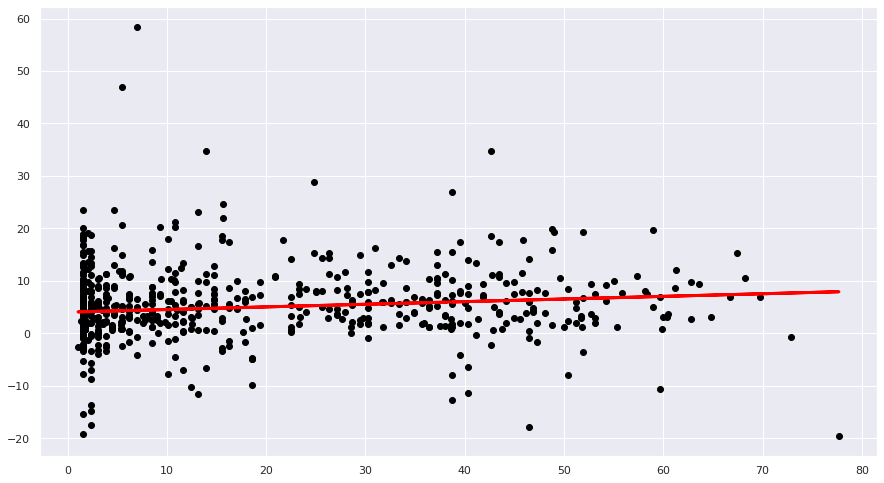

In [126]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_predicted, color="red", linewidth=3)


In [127]:
# gg= same_industry_df.set_index('Name')
# plt.style.use('fivethirtyeight')
# labels = ['Amazon', 'OTHERS']
# slices =[gg.loc['Amazon.com Inc','Total Assets'].mean(), gg.drop('Amazon.com Inc')['Total Assets'].sum()]
# explode=[0.1,0]
# plt.pie(slices, labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}) #Adds percentage
# plt.title("TOTAL ASSETS")
# plt.tight_layout()

In [128]:
# gg.loc['Amazon.com Inc','Total Assets']

In [129]:
# same_industry_df.loc['Amazon.com Inc']

In [130]:
# same_industry_df.groupby(['Name']).sum().plot(kind='pie', y='Total Assets')

In [131]:
# plt.pie(same_industry_df["Total Assets"], labels = same_industry_df["Name"])

In [132]:
# plt.style.use('fivethirtyeight')
# labels = ['Amazon', 'OTHERS']
# slices =[same_industry_df.loc['Amazon.com Inc','Total Assets'], same_industry_df.drop('Amazon.com Inc')['Total Assets'].sum()]
# explode=[0.1,0]
# plt.pie(slices, labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}) #Adds percentage
# plt.title("TOTAL ASSETS")
# plt.tight_layout()